# Poisson Simulation

This notebook aims to create a poisson simulation that is at first only simulating the arrival of a vehicle at a point in time.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tick.base import TimeFunction
import datetime as dt

from tick.plot import plot_point_process
from tick.hawkes import SimuInhomogeneousPoisson
import pandas as pd
import seaborn as sns
import random
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=13)

In [2]:
#Looking at platoons 
station = 'Ceneri'
#day_simulation(station, 'Saturday')

The poisson simulation will consist of taking all platoons(consisting of one or more heavy vehicle) and all cars and combining their hourly rates. With this combined hourly rates, a poisson simulation for each hour of the week will be composed. Then the simulation will be split, to do this the probability of each event occuring each hour will be applied to a random variable to assign

In [5]:
def day_simulation(station, weekday, headway):
    df = pd.read_pickle('{}Data/platoon_{}_seasonality_h{}.pkl'.format(station, 'Daily', headway))
    df_day = df.loc[df.index == weekday]
    df_day = df_day.groupby(['Hour'])

    run_time = 168 #hours in a week

    tf = TimeFunction((df_day.Hour, df_day.norm_count), dt=0.00028)

    # We define a 1 dimensional inhomogeneous Poisson process with the
    # intensity function seen above
    in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)

    # We activate intensity tracking and launch simulation
    in_poi.track_intensity(0.1)
    in_poi.simulate()

    # We plot the resulting inhomogeneous Poisson process with its
    # intensity and its ticks over time
    fig, axes = plt.subplots()
    plot_point_process(in_poi, ax=axes)
    axes.set_title('{} {} Inhomogeneous Natural Platoon > 2 Vehicles Poisson Simulation'.format(station, day))

    axes.yaxis.grid(True)
    axes.set_xlabel('Time (minutes)')
    axes.set_ylabel('Platoon intensity')


In [7]:
df = pd.read_pickle('{}Data/platoon_{}_seasonality.pkl'.format(station, 'Daily'))
day = 'Monday'
df_monday = df.loc[df.index == day]

In [8]:
df_monday = df_monday.groupby(['Hour'])

In [11]:
df_monday.head()

,seasonal_count,Hour,Minute,count,norm_count
Weekday,,,,,
Monday,443,0,0,2,0.004515
Monday,443,0,1,3,0.006772
Monday,443,0,2,3,0.006772
Monday,443,0,3,1,0.002257
Monday,443,0,4,3,0.006772
...,...,...,...,...,...
Monday,443,23,0,2,0.004515
Monday,443,23,1,5,0.011287
Monday,443,23,2,3,0.006772


In [2]:
#Read in the light vehicle data
df_light = pd.read_pickle('{}/car_inner_{}_seasonality_{}.pkl'.format(137, 'Daily', 2017))

FileNotFoundError: [Errno 2] No such file or directory: '137/car_inner_Daily_seasonality_2017.pkl'

In [ ]:
df_light_week =df_light.reset_index()

In [ ]:
df_light_week.head()

In [3]:
#Add a length of zero to the light week df, indicating that it's a car
df_light_week['Length'] = '0'

NameError: name 'df_light_week' is not defined

In [4]:
df_light_week['Length'] = df_light_week.Length.astype(str)

NameError: name 'df_light_week' is not defined

In [3]:
start_year = 2011
end_year = 2019
headway = 2

In [4]:
df_platoon_grouped = pd.read_pickle('{}Data/platoon_{}_seasonality_{}_{}_h{}_length.pkl'.format(station, 'Daily', start_year, end_year, headway))

In [5]:
df_platoon_grouped = df_platoon_grouped.reset_index()

In [6]:
df_platoon_grouped.head()

,Weekday,seasonal_count,Hour,Length,count,norm_count
0,Monday,443,0,1,6011,13.568849
1,Monday,443,0,2,92,0.207675
2,Monday,443,0,3,2,0.004515
3,Monday,443,1,1,5422,12.239278
4,Monday,443,1,2,68,0.153499


In [7]:
df_platoon_grouped['Length'] = '1+'

In [8]:
df_platoon_grouped = df_platoon_grouped.groupby(['Weekday', 'Hour', 'Length']).norm_count.sum()

In [9]:
df_platoon_grouped = df_platoon_grouped.reset_index()

In [17]:
merged= pd.concat([df_platoon_grouped, df_light_week])

In [18]:
merged.groupby(['Weekday', 'Hour']).norm_count.sum()

Weekday    Hour
Friday     0        335.863084
           1        229.187359
           2        158.581785
           3        166.892863
           4        252.924683
                      ...     
Wednesday  19      1055.234025
           20       768.835649
           21       603.762459
           22       546.981854
           23       436.105878
Name: norm_count, Length: 168, dtype: float64

In [19]:
merged_grouped = merged.groupby(['Weekday', 'Hour'],as_index=False).norm_count.sum()

In [20]:
merged_grouped.head()

,Weekday,Hour,norm_count
0,Friday,0,335.863084
1,Friday,1,229.187359
2,Friday,2,158.581785
3,Friday,3,166.892863
4,Friday,4,252.924683


In [5]:
df = pd.read_pickle('Models/Ceneri_lane5_heavy.pkl')

In [6]:
df = df.reset_index()

In [7]:
df = df['predicted_mean']

In [8]:
run_time = 24 #hours in a week

tf = TimeFunction((df.index, df), dt=0.00000028)

# We define a 1 dimensional inhomogeneous Poisson process with the
# intensity function seen above
in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)

# We activate intensity tracking and launch simulation
in_poi.track_intensity(0.1)
in_poi.simulate()

# We plot the resulting inhomogeneous Poisson process with its
# intensity and its ticks over time
fig, axes = plt.subplots()
plot_point_process(in_poi, ax=axes)
axes.set_title('Inhomogeneous Vehicles Block Poisson Simulation')

axes.yaxis.grid(True)
axes.set_xlabel('Time (hours)')
axes.set_ylabel('Platoon intensity')

plt.show()

In [41]:
in_poi.timestamps[0]

array([ 0.27102202,  0.35488836,  0.71537559,  0.8201945 ,  1.13708753,
        1.51802058,  1.59759045,  1.6761695 ,  2.26340387,  2.46830762,
        3.15578541,  3.36958388,  3.44151473,  3.45560984,  3.70645144,
        3.81809407,  4.40104764,  4.4946339 ,  4.56770337,  4.75905701,
        4.86443319,  5.07099615,  5.28026553,  5.39627487,  5.62521062,
        5.67991764,  5.75044118,  5.88447627,  5.9394307 ,  6.06496977,
        6.1557615 ,  6.34042521,  6.37367679,  6.38499886,  6.46695597,
        6.62627861,  6.66021311,  6.88053569,  6.99313218,  7.05475714,
        7.16751083,  7.22148267,  7.38641628,  7.45964241,  7.68961084,
        7.7055637 ,  7.73900039,  7.77836589,  7.80770246,  8.05314383,
        8.0695422 ,  8.0870372 ,  8.13596396,  8.18495798,  8.30510717,
        8.32553109,  8.45580702,  8.47324133,  8.50994042,  8.58983012,
        8.67725242,  8.68558215,  8.80086851,  8.94611007,  8.95835553,
        8.99346084,  9.01414186,  9.05396454,  9.05579309,  9.07

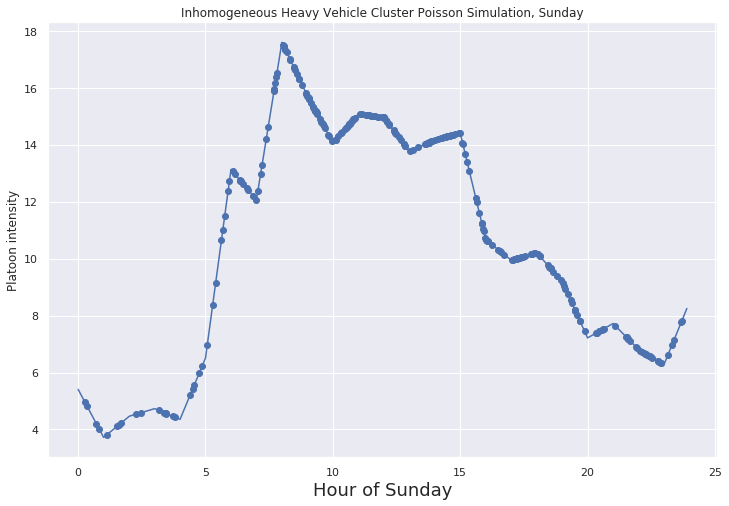

In [51]:
fig, axes = plt.subplots()
plot_point_process(in_poi, ax=axes)
#plt.plot(in_poi.intensity_tracked_times,in_poi.tracked_intensity[0])
axes.set_title('Inhomogeneous Heavy Vehicle Cluster Poisson Simulation, Sunday')

#plt.setp('color','red')
axes.yaxis.grid(True)
axes.set_xlabel('Hour of Sunday')
axes.set_ylabel('Platoon intensity')

plt.show()

In [11]:
%matplotlib inline

In [36]:
#First split the generated events into car/platoon(truck)
df_poi = pd.DataFrame(data=in_poi.timestamps)
df_poi = df_poi.T

In [37]:
df_poi.columns = ['Timestamp']

In [24]:
from tick.plot import plot_point_process

In [38]:
df_poi = pd.to_timedelta(df_poi.Timestamp, unit='h')

In [39]:
df_poi = df_poi.to_frame()

In [40]:
df_poi

,Timestamp
0,0 days 00:17:56.252126400
1,0 days 00:25:03.171990
2,0 days 00:37:59.575936800
3,0 days 00:46:41.892330
4,0 days 00:46:55.150946400
...,...
233,0 days 23:04:05.985130800
234,0 days 23:24:10.516503600
235,0 days 23:26:53.161321200
236,0 days 23:39:55.352527200


In [28]:
df_light_week.head()

,Weekday,seasonal_count,Hour,count,norm_count,Length
0,Monday,52,0,17487,336.288462,0
1,Monday,52,1,11073,212.942308,0
2,Monday,52,2,7478,143.807692,0
3,Monday,52,3,8822,169.653846,0
4,Monday,52,4,15489,297.865385,0


In [29]:
merged = merged.drop(columns=['seasonal_count', 'count'])

In [30]:
merged.groupby(['Weekday', 'Hour']).head()

,Weekday,Hour,Length,norm_count
0,Friday,0,1+,13.516930
1,Friday,1,1+,14.187359
2,Friday,2,1+,14.851016
3,Friday,3,1+,18.354402
4,Friday,4,1+,27.790068
...,...,...,...,...
163,Sunday,19,0,1150.660377
164,Sunday,20,0,932.150943
165,Sunday,21,0,761.943396
166,Sunday,22,0,635.188679


In [32]:
merged = merged.reset_index()

In [33]:
merged.groupby(['Weekday', 'Hour']).head()

,index,Weekday,Hour,Length,norm_count
0,0,Friday,0,1+,13.516930
1,1,Friday,1,1+,14.187359
2,2,Friday,2,1+,14.851016
3,3,Friday,3,1+,18.354402
4,4,Friday,4,1+,27.790068
...,...,...,...,...,...
331,163,Sunday,19,0,1150.660377
332,164,Sunday,20,0,932.150943
333,165,Sunday,21,0,761.943396
334,166,Sunday,22,0,635.188679


In [34]:
merged= merged.drop(columns='index')

In [35]:
merged['Prob'] = merged.groupby(['Weekday', 'Hour']).norm_count.apply(lambda x: x/ x.sum())

In [36]:
merged

,Weekday,Hour,Length,norm_count,Prob
0,Friday,0,1+,13.516930,0.040245
1,Friday,1,1+,14.187359,0.061903
2,Friday,2,1+,14.851016,0.093649
3,Friday,3,1+,18.354402,0.109977
4,Friday,4,1+,27.790068,0.109875
...,...,...,...,...,...
331,Sunday,19,0,1150.660377,0.971700
332,Sunday,20,0,932.150943,0.971331
333,Sunday,21,0,761.943396,0.968835
334,Sunday,22,0,635.188679,0.968817


In [37]:
#Take only the probability values for the lengths of greater than 1
truck_event = merged[merged.Length == '1+']

In [38]:
#Now want to take the probability of a truck event and draw from the available data this truck event. First, need to get the 
#truck events loaded
df_early = pd.read_pickle('{}Data/{}_{}_platoon_h2.pkl'.format(station, 2003, 2010))

In [39]:
df_late = pd.read_pickle('{}Data/{}_{}_platoon_h2.pkl'.format(station, 2011, 2019))

In [40]:
df = pd.concat([df_early, df_late])

In [ ]:
df = pd.read_pickle

In [41]:
df.head()

,Start,End,CLASS,GW_TOT,LENTH,Platoon,Length,Lane
0,2003-01-01 00:38:09,2003-01-01 00:38:09,[0],[3914],[963],False,1,2
1,2003-01-01 01:45:58,2003-01-01 01:45:58,[0],[3543],[458],False,1,2
2,2003-01-01 02:10:27,2003-01-01 02:10:27,[0],[4048],[442],False,1,2
3,2003-01-01 08:04:05,2003-01-01 08:04:05,[0],[3945],[712],False,1,2
4,2003-01-01 10:00:11,2003-01-01 10:00:11,[0],[3585],[1006],False,1,2


In [42]:
df['Weekday'] = df.Start.dt.weekday

In [43]:
df['Weekday'] = df.Weekday.map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: 'Thursday', 4: 'Friday',
                                                     5: 'Saturday', 6:'Sunday'})

In [44]:
df['Hour'] = df.Start.dt.hour

In [45]:
hour_counts = df.groupby(['Weekday', 'Hour']).Start.count()

In [46]:
hour_counts

Weekday    Hour
Friday     0        14538
           1        15330
           2        15690
           3        18899
           4        26019
                    ...  
Wednesday  19      179194
           20      130128
           21       68808
           22       23256
           23       15348
Name: Start, Length: 168, dtype: int64

In [48]:
df_poi['Prob'] = [random.uniform(0,1) for k in df_poi.index]

In [49]:
df_poi

,Timestamp,Prob
0,0 days 00:00:04.489905600,0.286304
1,0 days 00:00:09.538729200,0.108135
2,0 days 00:00:10.001890800,0.696975
3,0 days 00:00:14.729569200,0.456054
4,0 days 00:00:26.895679200,0.089092
...,...,...
163839,6 days 22:59:28.652510400,0.086355
163840,6 days 22:59:33.185522400,0.657064
163841,6 days 22:59:39.955639200,0.054756
163842,6 days 22:59:52.170622800,0.755778


In [50]:
df_poi['Weekday'] = df_poi.Timestamp.dt.days

In [51]:
df_poi['Weekday'] = df_poi.Weekday.map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: 'Thursday', 4: 'Friday',
                                                     5: 'Saturday', 6:'Sunday'})

In [52]:
df_poi['Hour'] = df_poi.Timestamp.dt.components['hours']

In [53]:
df_poi.head(10)

,Timestamp,Prob,Weekday,Hour
0,0 days 00:00:04.489905600,0.286304,Monday,0
1,0 days 00:00:09.538729200,0.108135,Monday,0
2,0 days 00:00:10.001890800,0.696975,Monday,0
3,0 days 00:00:14.729569200,0.456054,Monday,0
4,0 days 00:00:26.895679200,0.089092,Monday,0
5,0 days 00:00:37.702458,0.498639,Monday,0
6,0 days 00:00:41.609437200,0.858047,Monday,0
7,0 days 00:01:16.472427600,0.361660,Monday,0
8,0 days 00:01:18.978301200,0.696315,Monday,0
9,0 days 00:01:25.990291200,0.893229,Monday,0


In [54]:
df_poi.set_index(['Weekday', 'Hour'])

Timestamp      Prob
Weekday Hour                                    
Monday  0    0 days 00:00:04.489905600  0.286304
        0    0 days 00:00:09.538729200  0.108135
        0    0 days 00:00:10.001890800  0.696975
        0    0 days 00:00:14.729569200  0.456054
        0    0 days 00:00:26.895679200  0.089092
...                                ...       ...
Sunday  22   6 days 22:59:28.652510400  0.086355
        22   6 days 22:59:33.185522400  0.657064
        22   6 days 22:59:39.955639200  0.054756
        22   6 days 22:59:52.170622800  0.755778
        22   6 days 22:59:56.216115600  0.712777

[163844 rows x 2 columns]

In [59]:
truck_event = truck_event.set_index(['Weekday', 'Hour']).drop(columns=['Length', 'norm_count'])

In [60]:
truck_event.columns = ['Truck_Prob']

In [61]:
truck_event

Truck_Prob
Weekday   Hour            
Friday    0       0.040245
          1       0.061903
          2       0.093649
          3       0.109977
          4       0.109875
...                    ...
Wednesday 19      0.159264
          20      0.136106
          21      0.081147
          22      0.034773
          23      0.031419

[168 rows x 1 columns]

In [63]:
joined = df_poi.join(truck_event, on=['Weekday', 'Hour'])

In [68]:
joined['Truck'] = joined.Prob < joined.Truck_Prob

In [70]:
joined.Truck.value_counts()

False    139651
True      24193
Name: Truck, dtype: int64

In [74]:
sim_truck = joined[joined.Truck == True]

In [75]:
sim_truck

,Timestamp,Prob,Weekday,Hour,Truck_Prob,Truck
35,0 days 00:06:01.247742,0.016507,Monday,0,0.039367,True
47,0 days 00:08:37.231072800,0.024306,Monday,0,0.039367,True
82,0 days 00:14:27.483597600,0.014822,Monday,0,0.039367,True
89,0 days 00:15:22.543520400,0.031258,Monday,0,0.039367,True
117,0 days 00:20:17.403349200,0.013302,Monday,0,0.039367,True
...,...,...,...,...,...,...
163568,6 days 22:22:38.846809200,0.002455,Sunday,22,0.031183,True
163573,6 days 22:22:55.760898,0.024691,Sunday,22,0.031183,True
163637,6 days 22:30:18.979001999,0.028464,Sunday,22,0.031183,True
163742,6 days 22:45:25.566724800,0.021133,Sunday,22,0.031183,True


In [80]:
sim_truck = sim_truck.join(hour_counts, on=['Weekday', 'Hour'])

In [84]:
sim_truck = sim_truck.rename(columns={'Start': 'DrawCount'})

In [89]:
sim_truck['Draw'] =  sim_truck.apply(lambda row: random.randint(0,row.DrawCount), axis=1)

In [90]:
sim_truck

,Timestamp,Prob,Weekday,Hour,Truck_Prob,Truck,DrawCount,Draw
35,0 days 00:06:01.247742,0.016507,Monday,0,0.039367,True,13849,12336
47,0 days 00:08:37.231072800,0.024306,Monday,0,0.039367,True,13849,680
82,0 days 00:14:27.483597600,0.014822,Monday,0,0.039367,True,13849,7803
89,0 days 00:15:22.543520400,0.031258,Monday,0,0.039367,True,13849,5076
117,0 days 00:20:17.403349200,0.013302,Monday,0,0.039367,True,13849,12795
...,...,...,...,...,...,...,...,...
163568,6 days 22:22:38.846809200,0.002455,Sunday,22,0.031183,True,23907,21741
163573,6 days 22:22:55.760898,0.024691,Sunday,22,0.031183,True,23907,3923
163637,6 days 22:30:18.979001999,0.028464,Sunday,22,0.031183,True,23907,16228
163742,6 days 22:45:25.566724800,0.021133,Sunday,22,0.031183,True,23907,13525


In [96]:
df['DrawId'] = df.groupby(['Weekday', 'Hour']).cumcount()

In [97]:
df

,Start,End,CLASS,GW_TOT,LENTH,Platoon,Length,Lane,Weekday,Hour,DrawId
0,2003-01-01 00:38:09,2003-01-01 00:38:09,[0],[3914],[963],False,1,2,Wednesday,0,0
1,2003-01-01 01:45:58,2003-01-01 01:45:58,[0],[3543],[458],False,1,2,Wednesday,1,0
2,2003-01-01 02:10:27,2003-01-01 02:10:27,[0],[4048],[442],False,1,2,Wednesday,2,0
3,2003-01-01 08:04:05,2003-01-01 08:04:05,[0],[3945],[712],False,1,2,Wednesday,8,0
4,2003-01-01 10:00:11,2003-01-01 10:00:11,[0],[3585],[1006],False,1,2,Wednesday,10,0
...,...,...,...,...,...,...,...,...,...,...,...
12374172,2019-11-07 21:11:26,2019-11-07 21:11:26,[0],[3890],[1016],False,1,1,Thursday,21,67787
12374173,2019-11-07 21:14:20,2019-11-07 21:14:20,[0],[4350],[776],False,1,1,Thursday,21,67788
12374174,2019-11-07 21:17:15,2019-11-07 21:17:15,[0],[5410],[885],False,1,1,Thursday,21,67789
12374175,2019-11-07 21:20:42,2019-11-07 21:20:42,[0],[4470],[1351],False,1,1,Thursday,21,67790


In [98]:
sim_truck.merge(df, left_on=['Weekday', 'Hour', 'Draw'], right_on=['Weekday', 'Hour', 'DrawId'])

,Timestamp,Prob,Weekday,Hour,Truck_Prob,Truck,DrawCount,Draw,Start,End,CLASS,GW_TOT,LENTH,Platoon,Length,Lane,DrawId
0,0 days 00:06:01.247742,0.016507,Monday,0,0.039367,True,13849,12336,2014-06-16 00:49:00,2014-06-16 00:49:00,[11],[7140],[815],False,1,1,12336
1,0 days 00:08:37.231072800,0.024306,Monday,0,0.039367,True,13849,680,2009-08-10 00:26:10,2009-08-10 00:26:10,[11],[13520],[1294],False,1,2,680
2,0 days 00:14:27.483597600,0.014822,Monday,0,0.039367,True,13849,7803,2016-03-28 00:18:22,2016-03-28 00:18:22,[0],[3810],[1252],False,1,4,7803
3,0 days 00:15:22.543520400,0.031258,Monday,0,0.039367,True,13849,5076,2009-01-05 00:15:05,2009-01-05 00:15:05,[1128],[16030],[1719],False,1,1,5076
4,0 days 00:20:17.403349200,0.013302,Monday,0,0.039367,True,13849,12795,2016-01-25 00:31:36,2016-01-25 00:31:36,[11117],[18450],[2002],False,1,1,12795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24188,6 days 22:22:38.846809200,0.002455,Sunday,22,0.031183,True,23907,21741,2014-10-12 22:11:08,2014-10-12 22:11:08,[11],[18040],[1338],False,1,1,21741
24189,6 days 22:22:55.760898,0.024691,Sunday,22,0.031183,True,23907,3923,2007-02-25 22:56:50,2007-02-25 22:56:50,[11],[14296],[1257],False,1,4,3923
24190,6 days 22:30:18.979001999,0.028464,Sunday,22,0.031183,True,23907,16228,2013-09-22 22:51:11,2013-09-22 22:51:11,[12],[17910],[1299],False,1,3,16228
24191,6 days 22:45:25.566724800,0.021133,Sunday,22,0.031183,True,23907,13525,2016-09-25 22:50:22,2016-09-25 22:50:22,[12],[19590],[1360],False,1,4,13525


In [ ]:
def poisson_simulation_drawing(df, light_heavy, lane):
    